In [1]:
import pandas as pd

In [4]:
test_results = pd.read_csv('/Users/jimmy/Desktop/Price_Testing_Challenge/Pricing_Test/test_results.csv')
user_table =  pd.read_csv('/Users/jimmy/Desktop/Price_Testing_Challenge/Pricing_Test/user_table.csv') 
US_Incomes = pd.read_excel('/Users/jimmy/Desktop/Price_Testing_Challenge/Pricing_Test/US_Incomes.xlsx')

In [5]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [23]:
print(len(user_table))
print(len(test_results))
len(test_results.user_id.unique())

275616
316800


316800

In [24]:
compiled = test_results.merge(user_table); compiled.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [27]:
times = compiled['timestamp']
year = []
month =  []
day = []
hour = []
tot_day = []
Day_of_week = []

for k in range(len(compiled)):
    time = times[k]
    yeark = time[0:4]
    monthk = time[5:7]
    dayk = time[8:10]
    hourk = time[11:13]
    year.append(int(yeark))
    month.append(int(monthk))
    day.append(int(dayk))
    hour.append(int(hourk))
    
    tot_dayk = (int(time[5:7])-3)*30+int(time[8:10])
    tot_day.append(tot_dayk)
    
year = pd.Series(year)
month = pd.Series(month)
day = pd.Series(day)
hour = pd.Series(hour)
tot_days = pd.Series(tot_day)


final = compiled.copy(deep = False)


del final['timestamp']
final['year'] = year
final['month'] = month
final['day'] = day
final['hour'] = hour
final['total days'] = tot_days

final.dropna()
final.head()

,user_id,source,device,operative_system,test,price,converted,city,country,lat,long,year,month,day,hour,total days
0,604839,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,2015,5,8,3,68
1,624057,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,2015,5,10,21,70
2,317970,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,2015,4,4,15,34
3,685636,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,2015,5,7,7,67
4,820854,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,2015,5,24,11,84


In [28]:
time[2:4]

'15'

In [29]:
sales = final[final['converted'] == 1]
no_sales = final[final['converted'] == 0]

test = final[final['test'] == 1]
no_test = final[final['test'] == 0]

sales_39 = sales[sales['price'] == 39]
sales_59 = sales[sales['price'] == 59]
no_sales_39 = no_sales[no_sales['price'] == 39]
no_sales_59 = no_sales[no_sales['price'] == 59]

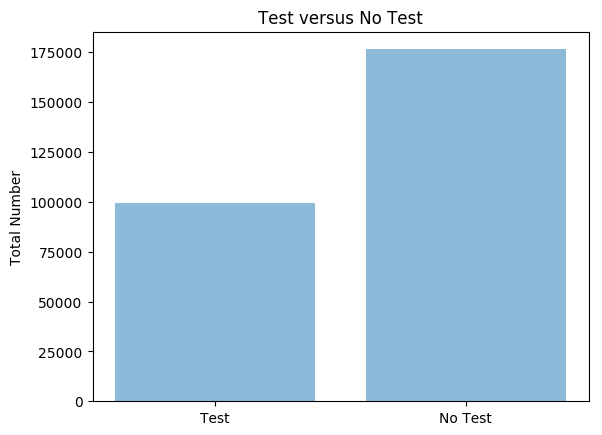

In [30]:
# Ratio of Totals (should be 33 percent)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

total_numbers = [len(test), len(no_test)]
objects = ('Test', 'No Test')
y_pos = np.arange(len(objects))

plt.bar(y_pos, total_numbers, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Number')
plt.title('Test versus No Test')
 
plt.show()

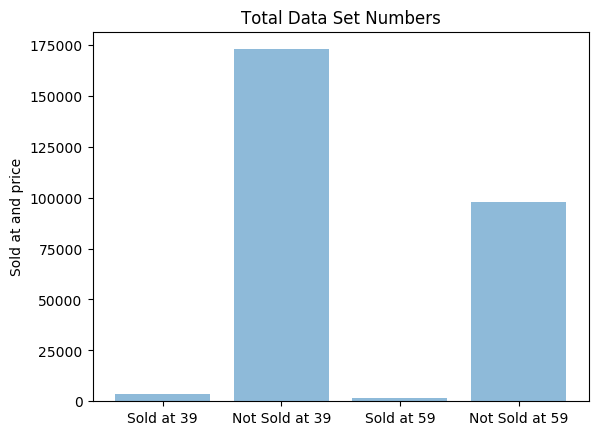

In [31]:
# Plot overall dataset sample size
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

total_numbers = [len(sales_39), len(no_sales_39), len(sales_59), len(no_sales_59)]
objects = ('Sold at 39', 'Not Sold at 39', 'Sold at 59', 'Not Sold at 59')
y_pos = np.arange(len(objects))

plt.bar(y_pos, total_numbers, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Sold at and price')
plt.title('Total Data Set Numbers')
 
plt.show()


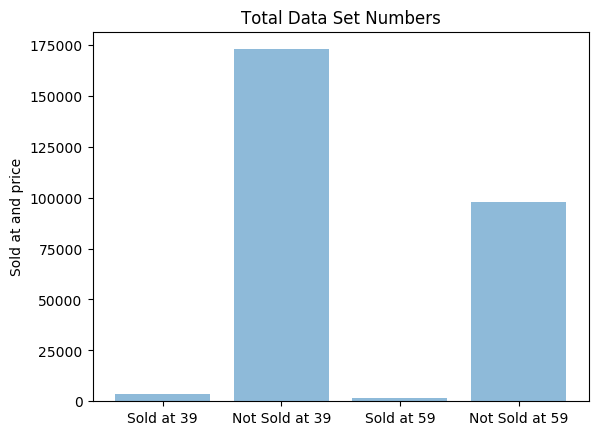

In [32]:
# Sales by Year
total_numbers = [len(sales_39), len(no_sales_39), len(sales_59), len(no_sales_59)]
objects = ('Sold at 39', 'Not Sold at 39', 'Sold at 59', 'Not Sold at 59')
y_pos = np.arange(len(objects))

plt.bar(y_pos, total_numbers, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Sold at and price')
plt.title('Total Data Set Numbers')
 
plt.show()


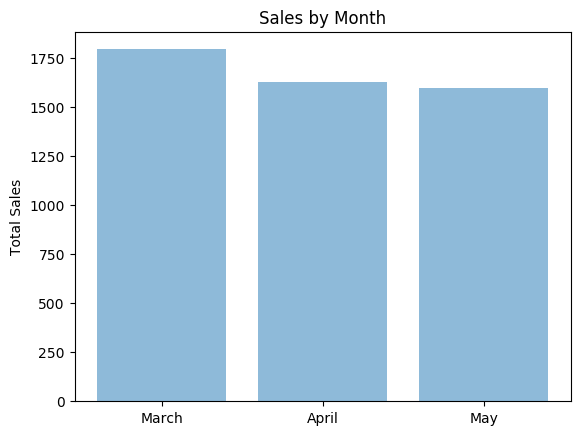

In [33]:
# Sales by Month
total_numbers = sales.month.value_counts()

objects = ('March', 'April', 'May')
y_pos = np.arange(len(objects))

plt.bar(y_pos, total_numbers, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Sales')
plt.title('Sales by Month')
 
plt.show()

In [34]:
# Sales by Year
sales.year.value_counts()
# Only one year, for 3 months included in database

2015    5019
Name: year, dtype: int64

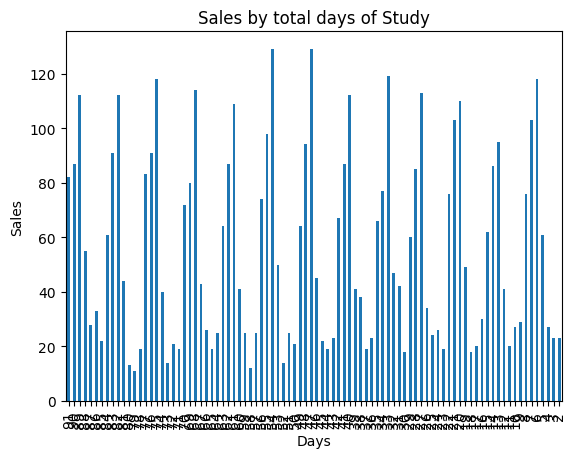

In [35]:
# Sales by day over study
pd.value_counts(sales['total days']).sort_index( ascending=False).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Days')
plt.title('Sales by total days of Study')
plt.show()
# Shows Weekly values (corresponds to purchases on Tuesdays

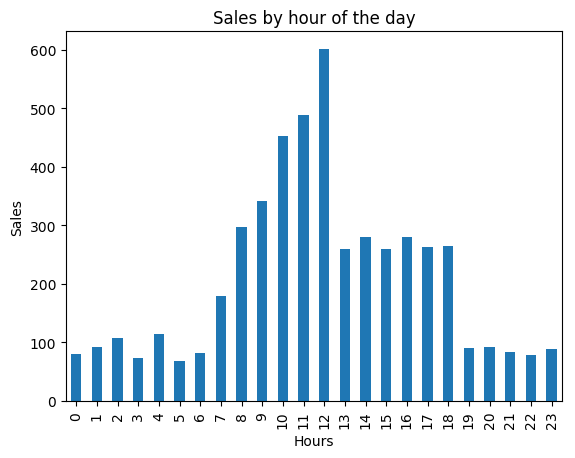

In [36]:
# Plot Data by Hour of day
pd.value_counts(sales['hour']).sort_index( ascending=True).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Hours')
plt.title('Sales by hour of the day')
plt.show()


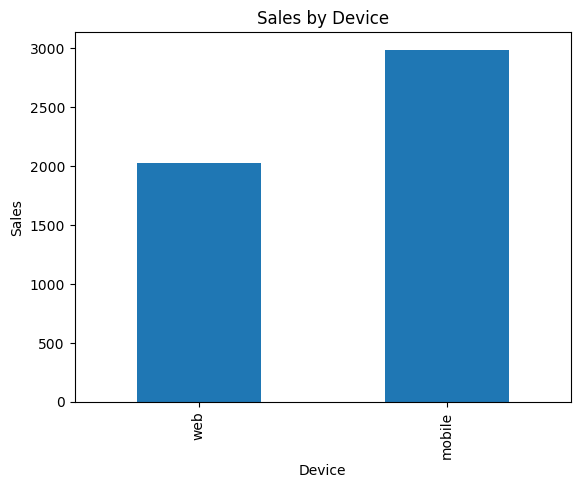

In [37]:
pd.value_counts(sales['device']).sort_index( ascending=False).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Device')
plt.title('Sales by Device')
plt.show()

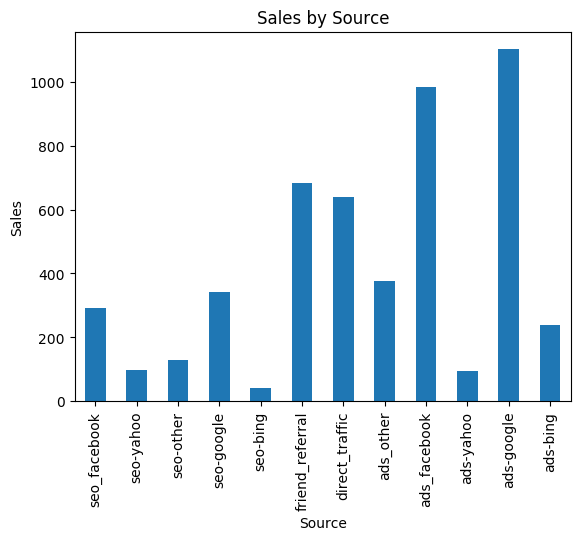

In [38]:
pd.value_counts(sales['source']).sort_index( ascending=False).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Source')
plt.title('Sales by Source')
plt.show()

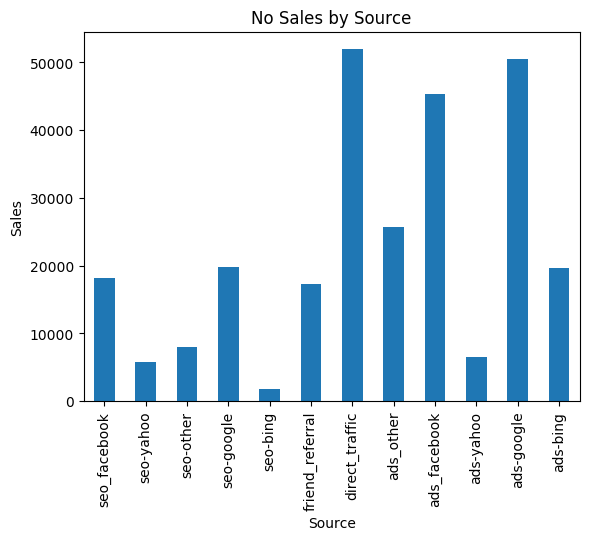

In [39]:
pd.value_counts(no_sales['source']).sort_index( ascending=False).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Source')
plt.title('No Sales by Source')
plt.show()

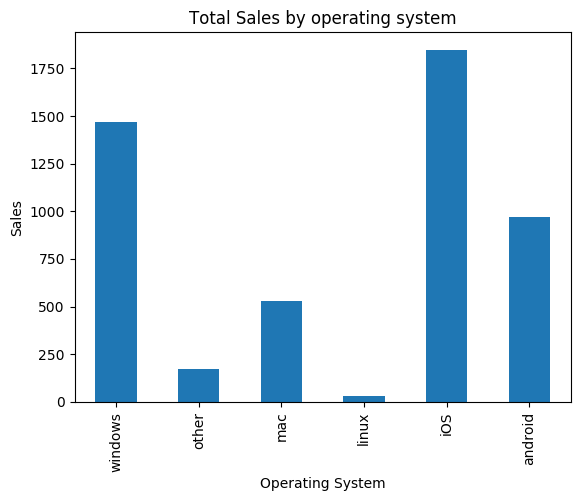

In [40]:
pd.value_counts(sales['operative_system']).sort_index( ascending=False).plot.bar()
plt.ylabel('Sales')
plt.xlabel('Operating System')
plt.title('Total Sales by operating system')
plt.show()

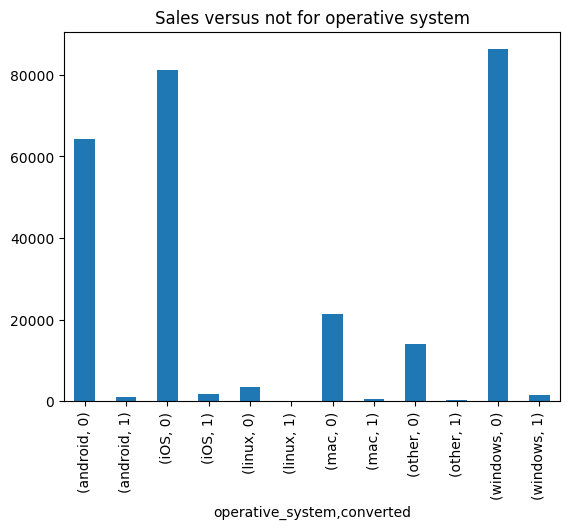

In [41]:
final.groupby(['operative_system','converted']).source.count().plot.bar()
plt.title('Sales versus not for operative system')
plt.show()

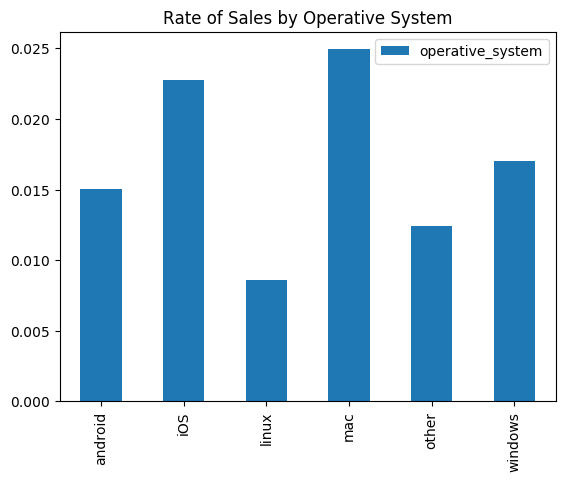

In [42]:
# Rate of sales by operative system
test = pd.value_counts(sales['operative_system'])/pd.value_counts(no_sales['operative_system'])
test = pd.DataFrame(test)
test.plot.bar()
plt.title('Rate of Sales by Operative System')
plt.show()

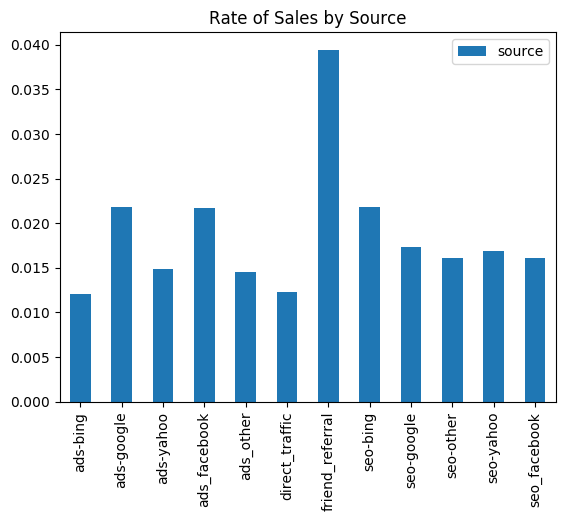

In [43]:
test = pd.value_counts(sales['source'])/pd.value_counts(no_sales['source'])
test = pd.DataFrame(test)
test.plot.bar()
plt.title('Rate of Sales by Source')
plt.show()

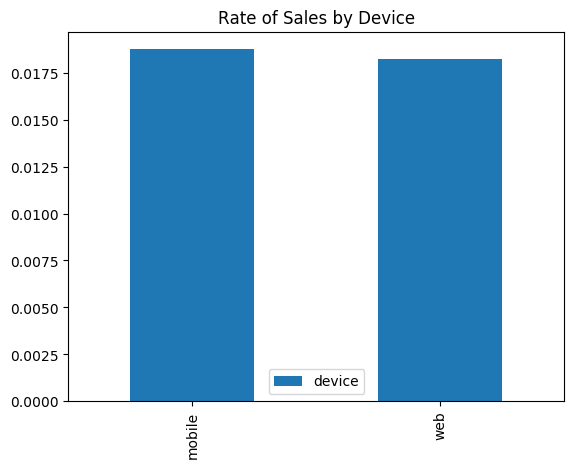

In [44]:
test = pd.value_counts(sales['device'])/pd.value_counts(no_sales['device'])
test = pd.DataFrame(test)
test.plot.bar()
plt.title('Rate of Sales by Device')
plt.show()

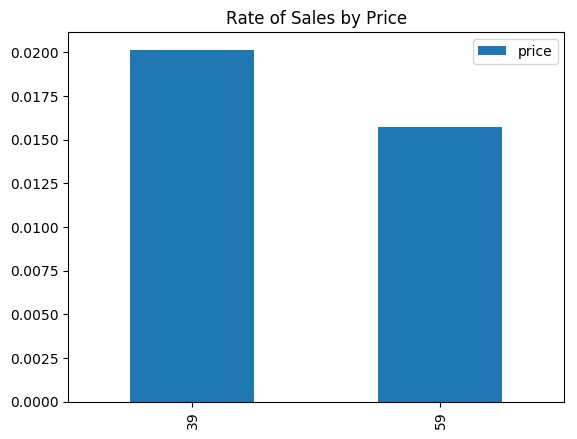

In [45]:
test = pd.value_counts(sales['price'])/pd.value_counts(no_sales['price'])
test = pd.DataFrame(test)
test.plot.bar()
plt.title('Rate of Sales by Price')
plt.show()

In [46]:
# Run Statistic to understand if there is a significant difference
Conversions = pd.DataFrame()
#Conversions['Price'] = ['39', '59']
Conversions['Not Converted'] = [len(no_sales_39), len(no_sales_59)]
Conversions['Converted'] = [len(sales_39), len(sales_59)]
Conversions

,Not Converted,Converted
0,172892,3484
1,97705,1535


In [47]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

result = chi2_contingency(Conversions)
chisq, p = result[:2]
print(p)
print(chisq)

# P value is very low, so there is a statistically significant difference between the two price points. 

7.47630830915e-16
65.0035546894


In [48]:
# Based on these rates of sales, total value generated by each price point would be
tot_sales_39 = 3484/172892
tot_sales_59 = 1535/97705

print(tot_sales_39)
print(tot_sales_59)

0.02015130833121255
0.01571055728980093


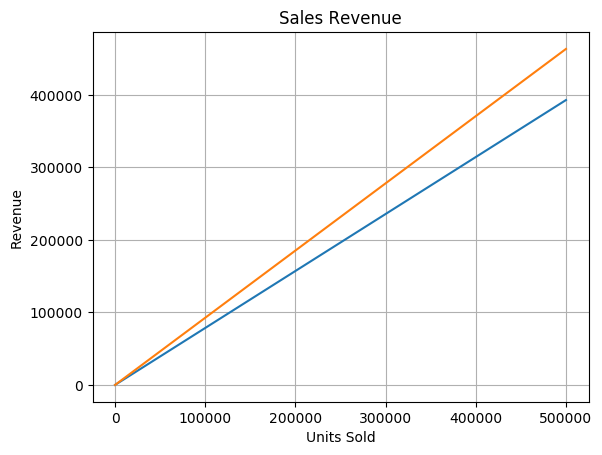

In [50]:
# When do these prices make sense per volume of sales?
from pylab import *
t = arange(0.0, 500000, 10)
s = t*tot_sales_39*39
q = t*tot_sales_59*59
plot(t, s)
plot(t,q)

xlabel('Units Sold')
ylabel('Revenue')
title('Sales Revenue')
grid(True)
show()

## Conclusions for Data

#### Friend recommendations are the most important source of sales 

#### Mac and IOS users are more likely to purchase product (averaged over both price points) 

#### There are critical times to sell product (Tuesdays at 10-12 seem to have the highest rate of sales)

#### For advertising, Ads on google and facebook are the most effective, bing, the least effective 

#### Bing had the highest conversion rate of sales


#### - Should sell for 59, will generate statistically significantly decreased sales but increase in revenue per product
####    will make up the difference leading to more revenue. 

